In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import math
from sklearn import model_selection
import shap 

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# Defining modle metrics
from sklearn.metrics import r2_score
def R2(y_true, y_pred):
    return round(r2_score(y_true, y_pred),3)
from sklearn.metrics import mean_squared_log_error
def MSLE(y_true, y_pred):
    return mean_squared_log_error(y_true, y_pred)
from sklearn.metrics import explained_variance_score
def EX_VAR(y_true, y_pred):
    return explained_variance_score(y_true, y_pred)
from sklearn.metrics import mean_absolute_error
def MAE(y_true, y_pred):
    return round(mean_absolute_error(y_true, y_pred),3)
from sklearn.metrics import mean_squared_error
def RMSE(y_true, y_pred):
    return round(mean_squared_error(y_true, y_pred,squared=True),3)

In [3]:
#Reading the data and droping a useless column and droping all rows with Nan values
#Scenario V-Modified.xlsx
DataSet = pd.read_excel( 'Dataset.xlsx').drop(columns=['name','DOI','content (%)', 'concrete elastic modulus(GPa)',
                                                          'Ductility index(deltap/deltay)','steel fiber type' ]).dropna()
# Making one hot encoding of a column
#data = pd.get_dummies(data=DataSet, columns=['steel fiber type'])
#data = data.drop(columns = ['Soil Type_Fissured'])
#data = data[data['Soil Type_Intact']>0]
# adding a new column with name Kfold, later we will use it 
data = DataSet.copy()

# scaling
scaler = MinMaxScaler()
scaler.fit(data)
data = pd.DataFrame(scaler.transform(data.values), index=data.index, columns=data.columns)

data['kfold'] = -1
print(data.columns)
print(len(data))
data.head(5)

Index(['fiber aspect ratio(mm/mm)', 'fiber density(g/cm3)',
       'volume fraction(%)', 'reinforcement ratio(%)', 'beam width(mm)',
       'beam height(mm)', 'beam length(mm)', 'shear span-depth ratio',
       'fiber tensile strength(MPa)', 'Ductility index(deltau/deltay)',
       'Max Load', 'Deltap', 'kfold'],
      dtype='object')
184


X does not have valid feature names, but MinMaxScaler was fitted with feature names


,fiber aspect ratio(mm/mm),fiber density(g/cm3),volume fraction(%),reinforcement ratio(%),beam width(mm),beam height(mm),beam length(mm),shear span-depth ratio,fiber tensile strength(MPa),Ductility index(deltau/deltay),Max Load,Deltap,kfold
0,0.000,0.0,0.000000,0.132394,0.25,0.171429,0.571429,0.683333,0.000000,0.390661,0.058660,0.522806,-1
1,0.000,0.0,0.000000,0.211268,0.25,0.171429,0.571429,0.683333,0.000000,0.224125,0.098821,0.402627,-1
2,0.650,1.0,0.666667,0.132394,0.25,0.171429,0.571429,0.683333,0.927787,0.159533,0.086762,0.153214,-1
3,0.650,1.0,0.666667,0.211268,0.25,0.171429,0.571429,0.683333,0.927787,0.145525,0.128629,0.107881,-1
4,0.975,1.0,0.666667,0.132394,0.25,0.171429,0.571429,0.683333,0.831947,0.159144,0.093588,0.164952,-1


In [4]:
#Random shuffling the data 
df = data.sample(frac= 1, random_state=10).reset_index(drop=True)

#Adding numbers for each fold of data to the Kfold column 
kf = model_selection.KFold(n_splits=5)
for fold, (trn_, val_) in enumerate(kf.split(X=df)):
    df.loc[val_, 'kfold'] = fold

# check the Kfold column, now we can select a scpecific chunk of data with using Kfold column
df.head(3)

,fiber aspect ratio(mm/mm),fiber density(g/cm3),volume fraction(%),reinforcement ratio(%),beam width(mm),beam height(mm),beam length(mm),shear span-depth ratio,fiber tensile strength(MPa),Ductility index(deltau/deltay),Max Load,Deltap,kfold
0,0.00,0.000000,0.000000,0.126761,0.125,0.214286,0.714286,0.516667,0.407654,0.052529,0.086989,0.090833,0
1,0.45,0.987342,0.666667,0.098592,0.250,0.071429,0.200000,0.258333,0.366057,0.112840,0.076181,0.036333,0
2,0.64,0.987342,0.253333,0.021127,0.700,0.285714,0.771429,0.321667,0.447587,0.140078,0.032948,0.127446,0


In [5]:
df.columns

Index(['fiber aspect ratio(mm/mm)', 'fiber density(g/cm3)',
       'volume fraction(%)', 'reinforcement ratio(%)', 'beam width(mm)',
       'beam height(mm)', 'beam length(mm)', 'shear span-depth ratio',
       'fiber tensile strength(MPa)', 'Ductility index(deltau/deltay)',
       'Max Load', 'Deltap', 'kfold'],
      dtype='object')

In [6]:

n_estimators = 5000
learning_rate = 0.01
min_samples_leaf = 1
min_samples_split = 2
max_depth = 1
result = []

for i in range (1):

    print ('////////////   fold  {}  ////////////'.format(i))

    n_estimators = 3000
    learning_rate = 0.001
    min_samples_leaf = 6
    min_samples_split = 4
    max_depth = 6

    # ******* model I *****************************************
    test_fold = i
    x_all = df.drop(columns= ['Max Load','Ductility index(deltau/deltay)','Deltap'])
    x_train = df[df['kfold']!= test_fold].drop(columns= ['Max Load','Ductility index(deltau/deltay)','Deltap'])
    y_train = df[df['kfold']!= test_fold]['Max Load']
    x_test = df[df['kfold']== test_fold].drop(columns= ['Max Load','Ductility index(deltau/deltay)','Deltap'])
    y_test = df[df['kfold']== test_fold]['Max Load']

    # training the first GBM with data
    GB_1 = GradientBoostingRegressor(n_estimators=n_estimators,learning_rate=learning_rate
    ,min_samples_leaf=min_samples_leaf ,min_samples_split=min_samples_split, max_depth=max_depth)
    GB_1.fit(x_train,y_train)
    pred_train_max_load = GB_1.predict(x_train)
    pred_test_max_load = GB_1.predict(x_test)
    explainer = shap.Explainer(GB_1)
    shap_values_GB1 = explainer(x_test)

    print ('*****test*****')
    print ('R2 Max load on {} fold = '.format(i), R2(y_test,pred_test_max_load.flatten()))
    print ('MAE Max load on {} fold = '.format(i), MAE(y_test,pred_test_max_load.flatten()))
    print ('RMSE Max load on {} fold = '.format(i), RMSE(y_test,pred_test_max_load.flatten()))

    print('****train******')
    print ('R2 Max load on {} fold = '.format(i), R2(y_train,pred_train_max_load.flatten()))
    print ('MAE Max load on {} fold = '.format(i), MAE(y_train,pred_train_max_load.flatten()))
    print ('RMSE Max load on {} fold = '.format(i), RMSE(y_train,pred_train_max_load.flatten()))
    print('size df = ', df.shape)
    # Concatinating max load prediction with the data
    df['max_load_pred'] = GB_1.predict(x_all)

    # ******* model II *****************************************
    n_estimators = 3000
    learning_rate = 0.001
    min_samples_leaf = 6
    min_samples_split = 4
    max_depth = 6

    x_all = df.drop(columns= ['Max Load','Ductility index(deltau/deltay)','Deltap'])
    x_train = df[df['kfold']!= test_fold].drop(columns= ['Max Load','Ductility index(deltau/deltay)','Deltap'])
    y_train = df[df['kfold']!= test_fold]['Deltap']
    x_test = df[df['kfold']== test_fold].drop(columns= ['Max Load','Ductility index(deltau/deltay)','Deltap'])
    y_test = df[df['kfold']== test_fold]['Deltap']

    # training the first GBM with data
    GB_2 = GradientBoostingRegressor(n_estimators=n_estimators,learning_rate=learning_rate
    ,min_samples_leaf=min_samples_leaf ,min_samples_split=min_samples_split, max_depth=max_depth)
    GB_2.fit(x_train,y_train)
    pred_train_Deltap = GB_2.predict(x_train)
    pred_test_Deltap = GB_2.predict(x_test)
    explainer = shap.Explainer(GB_2)
    shap_values_GB2 = explainer(x_test)

    print ('*****test*****')
    print ('R2 Deltap on {} fold = '.format(i), R2(y_test,pred_test_Deltap.flatten()))
    print ('MAE Deltap on {} fold = '.format(i), MAE(y_test,pred_test_Deltap.flatten()))
    print ('RMSE Deltap on {} fold = '.format(i), RMSE(y_test,pred_test_Deltap.flatten()))

    print('****train******')
    print ('R2 Deltap on {} fold = '.format(i), R2(y_train,pred_train_Deltap.flatten()))
    print ('MAE Deltap on {} fold = '.format(i), MAE(y_train,pred_train_Deltap.flatten()))
    print ('RMSE Deltap on {} fold = '.format(i), RMSE(y_train,pred_train_Deltap.flatten()))
    print('size df = ', df.shape)
    # Concatinating Deltap prediction with the data
    df['Deltap_pred'] = GB_2.predict(x_all)

    # ******* model III *****************************************
    n_estimators = 3000
    learning_rate = 0.001
    min_samples_leaf = 6
    min_samples_split = 4
    max_depth = 6

    x_all = df.drop(columns= ['Max Load','Ductility index(deltau/deltay)','Deltap'])
    x_train = df[df['kfold']!= test_fold].drop(columns= ['Max Load','Ductility index(deltau/deltay)','Deltap'])
    y_train = df[df['kfold']!= test_fold]['Ductility index(deltau/deltay)']
    x_test = df[df['kfold']== test_fold].drop(columns= ['Max Load','Ductility index(deltau/deltay)','Deltap'])
    y_test = df[df['kfold']== test_fold]['Ductility index(deltau/deltay)']

    # training the first GBM with data
    GB_3 = GradientBoostingRegressor(n_estimators=n_estimators,learning_rate=learning_rate
    ,min_samples_leaf=min_samples_leaf ,min_samples_split=min_samples_split, max_depth=max_depth)
    GB_3.fit(x_train,y_train)
    pred_train_Ductility_index = GB_3.predict(x_train)
    pred_test_Ductility_index = GB_3.predict(x_test)
    explainer = shap.Explainer(GB_3)
    shap_values_GB3 = explainer(x_test)

    print ('*****test*****')
    print ('R2 Ductility index on {} fold = '.format(i), R2(y_test,pred_test_Ductility_index.flatten()))
    print ('MAE Ductility index on {} fold = '.format(i), MAE(y_test,pred_test_Ductility_index.flatten()))
    print ('RMSE Ductility index on {} fold = '.format(i), RMSE(y_test,pred_test_Ductility_index.flatten()))

    print('****train******')
    print ('R2 Ductility index on {} fold = '.format(i), R2(y_train,pred_train_Ductility_index.flatten()))
    print ('MAE Ductility index on {} fold = '.format(i), MAE(y_train,pred_train_Ductility_index.flatten()))
    print ('RMSE Ductility index on {} fold = '.format(i), RMSE(y_train,pred_train_Ductility_index.flatten()))
    print('size df = ', df.shape)
    # Concatinating max load prediction with the data
    df['Ductility_index_pred'] = GB_3.predict(x_all)




////////////   fold  0  ////////////
*****test*****
R2 Max load on 0 fold =  0.921
MAE Max load on 0 fold =  0.023
RMSE Max load on 0 fold =  0.001
****train******
R2 Max load on 0 fold =  0.943
MAE Max load on 0 fold =  0.021
RMSE Max load on 0 fold =  0.002
size df =  (184, 13)
*****test*****
R2 Deltap on 0 fold =  0.683
MAE Deltap on 0 fold =  0.052
RMSE Deltap on 0 fold =  0.007
****train******
R2 Deltap on 0 fold =  0.891
MAE Deltap on 0 fold =  0.034
RMSE Deltap on 0 fold =  0.004
size df =  (184, 14)
*****test*****
R2 Ductility index on 0 fold =  0.528
MAE Ductility index on 0 fold =  0.061
RMSE Ductility index on 0 fold =  0.007
****train******
R2 Ductility index on 0 fold =  0.805
MAE Ductility index on 0 fold =  0.041
RMSE Ductility index on 0 fold =  0.005
size df =  (184, 15)


In [7]:
df.head()

,fiber aspect ratio(mm/mm),fiber density(g/cm3),volume fraction(%),reinforcement ratio(%),beam width(mm),beam height(mm),beam length(mm),shear span-depth ratio,fiber tensile strength(MPa),Ductility index(deltau/deltay),Max Load,Deltap,kfold,max_load_pred,Deltap_pred,Ductility_index_pred
0,0.00,0.000000,0.000000,0.126761,0.125,0.214286,0.714286,0.516667,0.407654,0.052529,0.086989,0.090833,0,0.086356,0.129639,0.147928
1,0.45,0.987342,0.666667,0.098592,0.250,0.071429,0.200000,0.258333,0.366057,0.112840,0.076181,0.036333,0,0.060486,0.047811,0.135718
2,0.64,0.987342,0.253333,0.021127,0.700,0.285714,0.771429,0.321667,0.447587,0.140078,0.032948,0.127446,0,0.061349,0.235318,0.229401
3,0.60,0.987342,0.666667,0.140845,0.000,0.071429,0.142857,0.350000,0.366057,0.428016,0.046828,0.162661,0,0.059357,0.065663,0.188018
4,0.64,0.993671,0.250000,0.178873,0.300,0.271429,0.357143,0.266667,0.532446,0.267704,0.244368,0.073784,0,0.197493,0.090089,0.148128


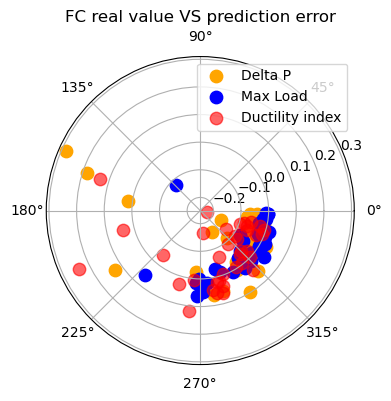

In [8]:
# Compute areas and colors
#N = 150
#area = 200 * r**2 , s=area
#colors = theta

range_error = 1
fig = plt.figure(figsize =(4,4))
ax = fig.add_subplot(projection='polar')

#ax.set_rlim(-1500,2500)
#c = ax.scatter(angel, data['Error'], c=data['Error'], cmap='hsv', alpha=0.75)

y_test = df[df['kfold']== 0]['Deltap']
y_pred = df[df['kfold']== 0]['Deltap_pred']
angel = (1 - y_test/range_error ) * 2 * np.pi
c = ax.scatter(angel, (y_test.to_numpy() - y_pred.to_numpy()), alpha=1, label= 'Delta P', color ='orange',
               s=80,marker = 'o')

y_test = df[df['kfold']== 0]['Max Load']
y_pred = df[df['kfold']== 0]['max_load_pred']
angel = (1 - y_test/range_error ) * 2 * np.pi
c = ax.scatter(angel, (y_test.to_numpy() - y_pred.to_numpy()), alpha=1, color = 'blue',
               label= 'Max Load', s=80,marker = 'o')



y_test = df[df['kfold']== 0]['Ductility index(deltau/deltay)']
y_pred = df[df['kfold']== 0]['Ductility_index_pred']
angel = (1 - y_test/range_error ) * 2 * np.pi
c = ax.scatter(angel, (y_test.to_numpy() - y_pred.to_numpy()), alpha=0.6, color = 'red', label= 'Ductility index',
               s=80,marker = 'o')



ax.legend()
plt.title("FC real value VS prediction error")
plt.savefig('fig.png', dpi = 400)

In [9]:

#x_test_shap = x_test.drop(columns =['Deltap_pred','max_load_pred', 'kfold'])
x_test_shap = x_test.drop(columns =['Deltap_pred', 'kfold'])
x_test_shap.head()


,fiber aspect ratio(mm/mm),fiber density(g/cm3),volume fraction(%),reinforcement ratio(%),beam width(mm),beam height(mm),beam length(mm),shear span-depth ratio,fiber tensile strength(MPa),max_load_pred
0,0.00,0.000000,0.000000,0.126761,0.125,0.214286,0.714286,0.516667,0.407654,0.086356
1,0.45,0.987342,0.666667,0.098592,0.250,0.071429,0.200000,0.258333,0.366057,0.060486
2,0.64,0.987342,0.253333,0.021127,0.700,0.285714,0.771429,0.321667,0.447587,0.061349
3,0.60,0.987342,0.666667,0.140845,0.000,0.071429,0.142857,0.350000,0.366057,0.059357
4,0.64,0.993671,0.250000,0.178873,0.300,0.271429,0.357143,0.266667,0.532446,0.197493


In [ ]:
fig = shap.plots.beeswarm(shap_values_GB1, show=False)
plt.tight_layout()
#plt.savefig('shap_Max_load.pdf')

In [ ]:
fig = shap.plots.beeswarm(shap_values_GB2, show=False)
plt.tight_layout()
#plt.savefig('shap_DeltaP.pdf')

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


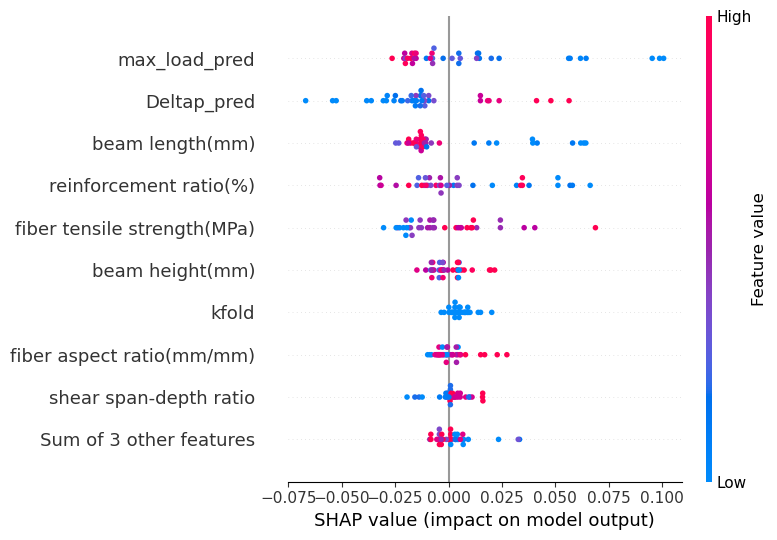

In [13]:
fig = shap.plots.beeswarm(shap_values_GB3, show=False)
plt.tight_layout()
#plt.savefig('shap_Ductility_index.pdf')